✓ All imports successful!
PyTorch version: 2.8.0
CUDA available: False
Using device: cpu
Loading MNIST dataset...
✓ Data loaded successfully!
  Training batches: 938
  Test batches: 157


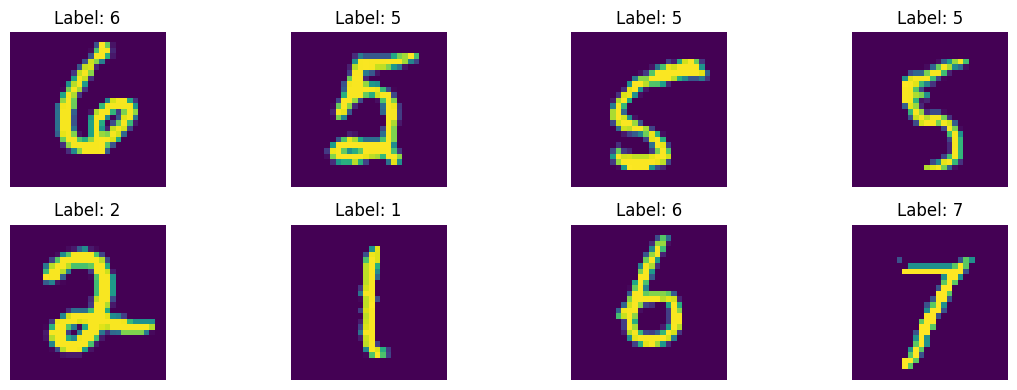

Sample batch shape: torch.Size([64, 1, 28, 28])
Sample labels: tensor([6, 5, 5, 5, 2, 1, 6, 7])
Creating CNN model...

Model Architecture:
CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 1,199,882
Trainable parameters: 1,199,882
✓ Loss function: CrossEntropyLoss()
✓ Optimizer: Adam
✓ Learning rate: 0.001

Starting training for 5 epochs...

Epoch 1/5, Batch 0, Loss: 2.3199
Epoch 1/5, Batch 100, Loss: 0.0848
Epoch 1/5, Batch 200, Loss: 0.1185
Epoch 1/5, Batch 300, Loss: 0.1205
Epoch 1/5, Batch 400, Loss: 0.0281
Epoch 1/5, Batch 500, Loss: 0.1402
Epoch 1/5, Batch 600, Loss: 0.1410
Epoch 1/5, Batch 700, Loss: 0.0608
Epoch 1/5, Batch 800, Loss: 0.1381
Epoch 1/5, Batch 900, Loss: 0.082

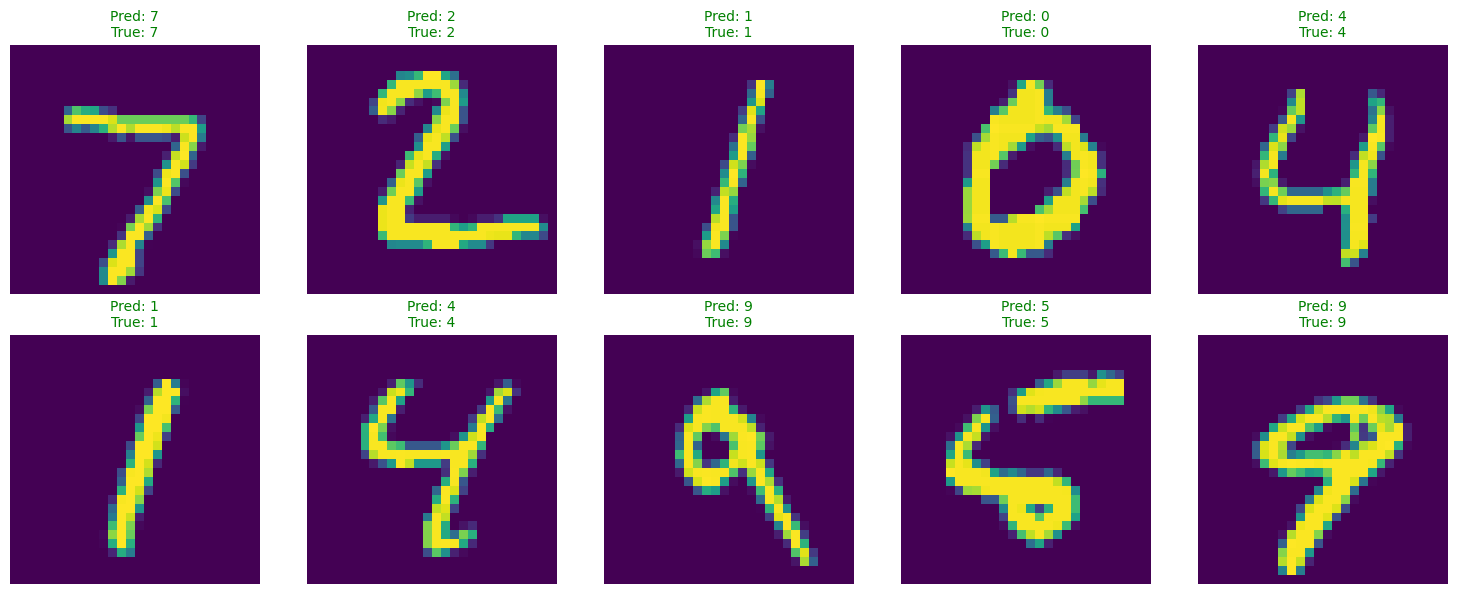

Batch accuracy: 100.00%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 2.3.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/aidynbekmussa/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [1]:
# Cell 1: Import all necessary libraries
from helper_lib.data_loader import get_data_loader
from helper_lib.trainer import train_model
from helper_lib.evaluator import evaluate_model
from helper_lib.model import get_model
from helper_lib.utils import save_model
import torch.nn as nn
import torch.optim as optim
import torch

print("✓ All imports successful!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# Cell 2: Set up device and hyperparameters
# Use GPU if available, otherwise CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Hyperparameters
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 5
MODEL_NAME = 'CNN'  # Options: 'FCNN', 'CNN', 'EnhancedCNN'

# Cell 3: Load the data
# Option A: Using MNIST (built-in dataset - good for testing)
print("Loading MNIST dataset...")
train_loader = get_data_loader('mnist', batch_size=BATCH_SIZE, train=True, dataset_type='mnist')
test_loader = get_data_loader('mnist', batch_size=BATCH_SIZE, train=False, dataset_type='mnist')

# Option B: Using your custom ImageFolder data (uncomment when you have data)
# train_loader = get_data_loader('data/train', batch_size=BATCH_SIZE, train=True)
# test_loader = get_data_loader('data/test', batch_size=BATCH_SIZE, train=False)

print(f"✓ Data loaded successfully!")
print(f"  Training batches: {len(train_loader)}")
print(f"  Test batches: {len(test_loader)}")

# Cell 4: Visualize some sample data (optional but helpful)
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title=None):
    """Display image"""
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis('off')

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
fig = plt.figure(figsize=(12, 4))
for idx in range(8):
    ax = fig.add_subplot(2, 4, idx+1)
    imshow(images[idx], title=f'Label: {labels[idx].item()}')
plt.tight_layout()
plt.show()

print(f"Sample batch shape: {images.shape}")
print(f"Sample labels: {labels[:8]}")

# Cell 5: Create the model
print(f"Creating {MODEL_NAME} model...")
model = get_model(MODEL_NAME)
model = model.to(device)

# Print model architecture
print("\nModel Architecture:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Cell 6: Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print(f"✓ Loss function: {criterion}")
print(f"✓ Optimizer: {optimizer.__class__.__name__}")
print(f"✓ Learning rate: {LEARNING_RATE}")

# Cell 7: Train the model
print(f"\n{'='*60}")
print(f"Starting training for {EPOCHS} epochs...")
print(f"{'='*60}\n")

trained_model = train_model(
    model=model,
    data_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    epochs=EPOCHS
)

print(f"\n{'='*60}")
print("Training completed!")
print(f"{'='*60}\n")

# Cell 8: Evaluate the model
print(f"\n{'='*60}")
print("Evaluating model on test set...")
print(f"{'='*60}\n")

avg_loss, accuracy = evaluate_model(
    model=trained_model,
    data_loader=test_loader,
    criterion=criterion,
    device=device
)

print(f"\nFinal Test Results:")
print(f"  Loss: {avg_loss:.4f}")
print(f"  Accuracy: {accuracy:.2f}%")

# Cell 9: Save the trained model
model_path = f'{MODEL_NAME}_trained.pth'
save_model(trained_model, path=model_path)
print(f"✓ Model saved to {model_path}")

# Cell 10: Make predictions on sample images (optional)
print("\nMaking predictions on sample test images...")

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Make predictions
trained_model.eval()
with torch.no_grad():
    outputs = trained_model(images)
    _, predicted = torch.max(outputs, 1)

# Show results
images = images.cpu()
predicted = predicted.cpu()
labels = labels.cpu()

fig = plt.figure(figsize=(15, 6))
for idx in range(10):
    ax = fig.add_subplot(2, 5, idx+1)
    imshow(images[idx])
    color = 'green' if predicted[idx] == labels[idx] else 'red'
    ax.set_title(f'Pred: {predicted[idx].item()}\nTrue: {labels[idx].item()}', 
                 color=color, fontsize=10)
plt.tight_layout()
plt.show()

# Calculate accuracy on this batch
correct = (predicted == labels).sum().item()
total = labels.size(0)
print(f"Batch accuracy: {100 * correct / total:.2f}%")

# Cell 11: Confusion Matrix (optional but very useful)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("Generating confusion matrix...")

# Get all predictions
all_preds = []
all_labels = []

trained_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = trained_model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Cell 12: Summary and next steps
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Model: {MODEL_NAME}")
print(f"Dataset: MNIST (or your custom dataset)")
print(f"Epochs: {EPOCHS}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Final Test Accuracy: {accuracy:.2f}%")
print(f"Final Test Loss: {avg_loss:.4f}")
print(f"Model saved to: {model_path}")
print("="*60)

print("\nNext Steps:")
print("1. Try different models: 'FCNN', 'CNN', or 'EnhancedCNN'")
print("2. Adjust hyperparameters (epochs, batch_size, learning_rate)")
print("3. Add data augmentation in data_loader.py")
print("4. Try different optimizers (SGD, RMSprop, etc.)")
print("5. Implement learning rate scheduling")
print("6. Use your own custom dataset")